In [11]:
# !pip install -U imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
data = pd.read_csv('Customer-Churn.csv')
data

dic = {
        ord('a'): np.array([ord('à'),ord('á'),ord('ã'),ord('â')]),
        ord('o'): np.array([ord('ó')]),
        ord('i'): np.array([ord('í')]),
        ord('e'): np.array([ord('é')]),
        ord('u'): np.array([ord('ú')])
    }

In [3]:
map = {'Sim':1,'Nao':0}
mod_data = data[['Conjuge','Dependentes', 'TelefoneFixo', 'PagamentoOnline','Churn']].replace(map)

dummies = pd.get_dummies(data.drop(['Conjuge','Dependentes', 'TelefoneFixo', 'PagamentoOnline','Churn'], axis=1))

final_data = pd.concat([mod_data,dummies],axis=1)

final_data

In [7]:
pd.set_option('display.max_columns', 39)
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False
1,0,0,1,0,0,0,34,56.95,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False
2,0,0,1,1,1,0,2,53.85,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False
3,0,0,0,0,0,0,45,42.30,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,True
4,0,0,1,1,1,0,2,70.70,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False


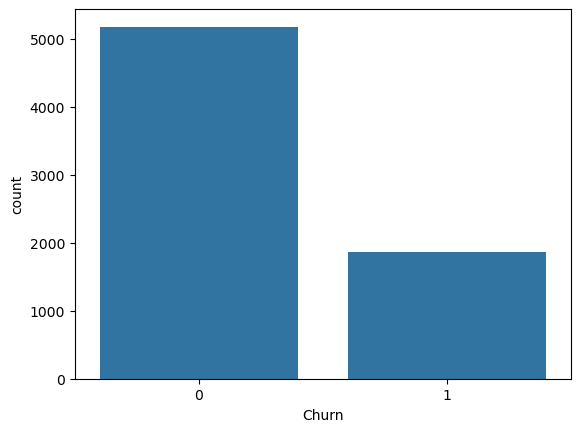

In [9]:
ax = sb.countplot(x='Churn', data=final_data)

In [14]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  

X = final_data.drop('Churn', axis = 1)
y = final_data['Churn']

from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  
X, y = smt.fit_resample(X, y)  

dados_final = pd.concat([X, y], axis=1) 

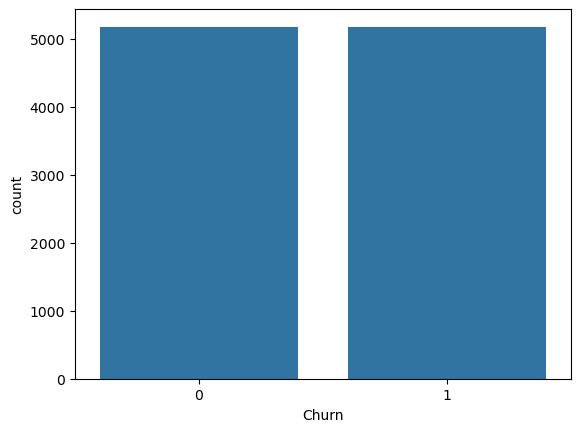

In [15]:

ax = sb.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

In [ ]:
from gen_data_analyser import MLDataAnalysis as mldata
import numpy as np
uri= 'Customer-Churn.csv'
obj = mldata(uri=uri, version='portuguese')


In [ ]:
var = np.array(['Não','Não','não','não', 'Sim', 'sim','sim','não','sim']).tolist()

sec = obj.replace_tilda(' '.join(var),dic).split()

# ' '.join(sec).lower().split()

sec

In [ ]:
new = obj.processing_data(tilda=False)


In [ ]:
# dummies = pd.get_dummies(new.drop(['Conjuge','Dependentes', 'TelefoneFixo', 'PagamentoOnline','Churn'], axis=1))

# final_data = pd.concat([new[['Conjuge','Dependentes', 'TelefoneFixo', 'PagamentoOnline','Churn']],dummies],axis=1)

# final_data